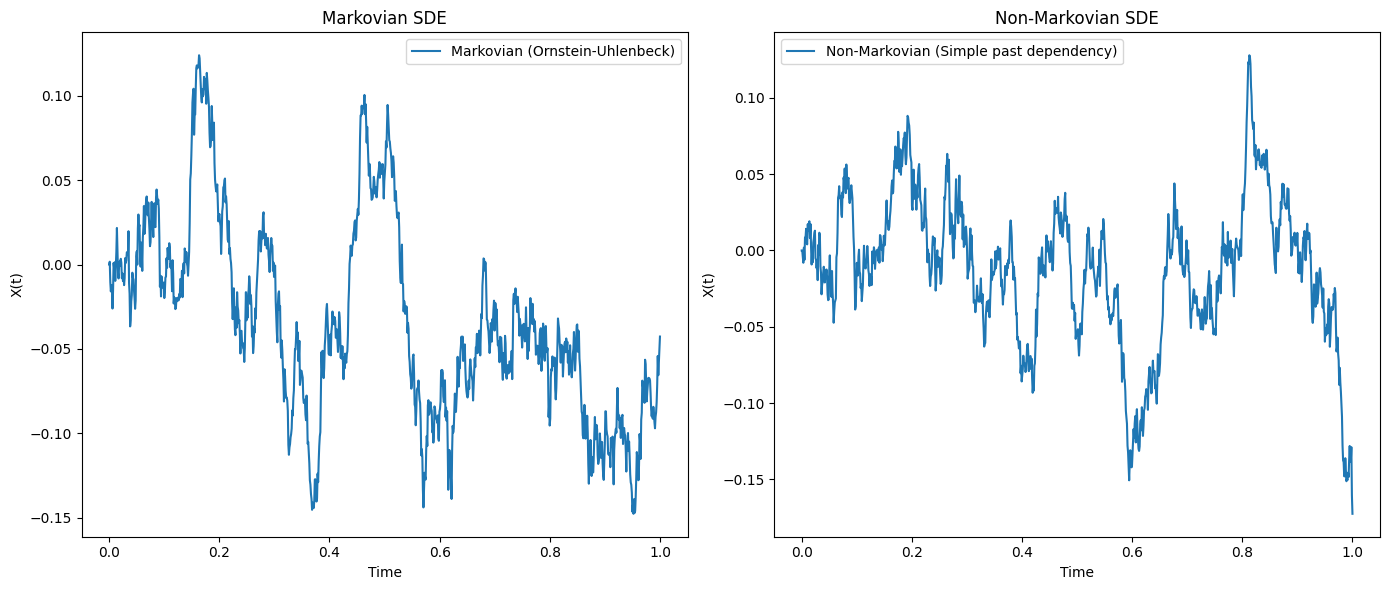

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters for the simulation
T = 1.0  # Total time
N = 1000  # Number of time steps
dt = T/N  # Time step size
t = np.linspace(0, T, N)  # Time vector

# Function for the Markovian process (Ornstein-Uhlenbeck process)
def markovian_process(theta, mu, sigma):
    x = np.zeros(N)
    for i in range(1, N):
        x[i] = x[i-1] + theta*(mu - x[i-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
    return x

# Function for the Non-Markovian process (with a simple past dependency for demonstration)
def non_markovian_process(alpha, sigma):
    x = np.zeros(N)
    for i in range(2, N):
        # Past dependency is introduced by depending on x[i-2]
        x[i] = x[i-1] + alpha*(x[i-1] - x[i-2])*dt + sigma*np.sqrt(dt)*np.random.normal()
    return x

# Parameters for the Markovian Ornstein-Uhlenbeck process
theta = 10.0  # Speed of reversion
mu = 0.0      # Long-term mean
sigma = 0.3   # Volatility

# Parameters for the Non-Markovian process
alpha = 0.5   # Dependency factor
sigma_nm = 0.3  # Volatility

# Generate paths
markovian_path = markovian_process(theta, mu, sigma)
non_markovian_path = non_markovian_process(alpha, sigma_nm)

# Create plots
plt.figure(figsize=(14, 6))

# Markovian process plot
plt.subplot(1, 2, 1)
plt.plot(t, markovian_path, label='Markovian (Ornstein-Uhlenbeck)')
plt.title('Markovian SDE')
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.legend()

# Non-Markovian process plot
plt.subplot(1, 2, 2)
plt.plot(t, non_markovian_path, label='Non-Markovian (Simple past dependency)')
plt.title('Non-Markovian SDE')
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.legend()

plt.tight_layout()
plt.show()
